# Working with Spatio-temporal data in Python

## Share your jupyter notebook with nbviewer

In [1]:
def drawmap(ax,map,x,y,VO, cmap, bounds, norm, title):
    
    ax.set_title(title, fontsize=14)

    map.drawcoastlines()
    map.fillcontinents(color='#ffe2ab')
# draw parallels and meridians.
    map.drawparallels(np.arange(-90.,91.,20.))
    map.drawmeridians(np.arange(-180.,181.,10.))
    map.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
    cs = map.contourf(x,y,VO, cmap=cmap, norm=norm, levels=bounds,shading='interp', zorder=1, ax=ax)

    return cs
    
def myanimate(i, ax, map, x,y,VO, cmap, bounds, norm):
    ax.clear()
    # change VO (randomly...)
    VO += 0.1 * np.random.randn()
    new_contour = drawmap(ax,map,x,y,VO, cmap, bounds, norm, 'ECMWF ERA-Interim VO at 850 hPa: Frame %03d'%(i) ) 
    return new_contour

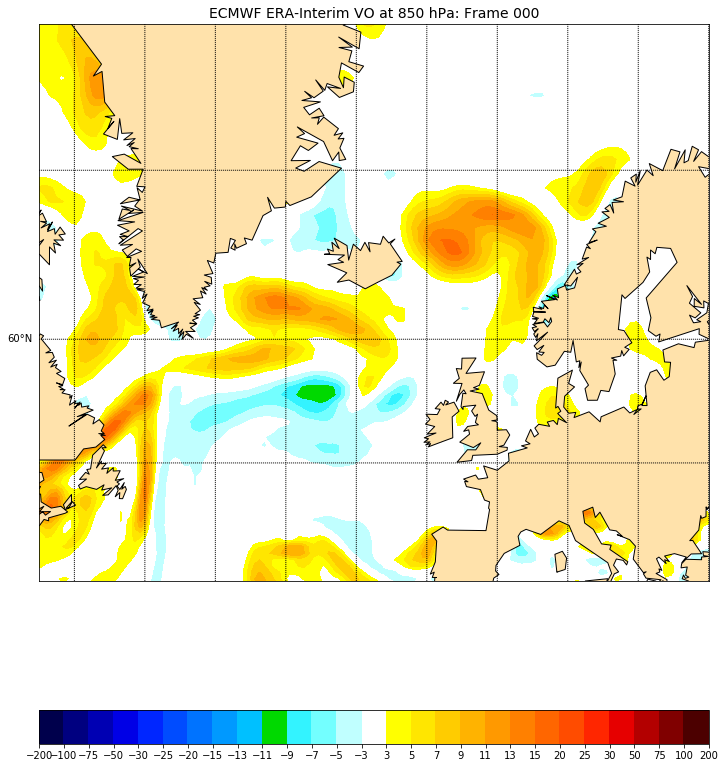

In [2]:
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
from matplotlib import colors as c
import matplotlib.animation as animation
from IPython.display import HTML
%matplotlib inline
from mpl_toolkits.basemap import Basemap, shiftgrid
import numpy as np
import netCDF4


FFMpegWriter = animation.writers['ffmpeg']
metadata = dict(title='ECMWF ERA-Interim VO at 850 hPa from 2001-06-01 00:00', artist='Carpentry@UIO',
                comment='Movie for ECMWF ERA-Interim VO at 850 hPa from 2001-06-01 00:00')
writer = FFMpegWriter(fps=20, metadata=metadata)


f = netCDF4.Dataset('EI_VO_850hPa_Summer2001.nc', 'r')
lats = f.variables['lat'][:]
lons = f.variables['lon'][:]
VO = f.variables['VO'][0,0,:,:]*100000  # read first time and unique level
fig = plt.figure(figsize=[12,15])  # a new figure window
ax = fig.add_subplot(1, 1, 1)  # specify (nrows, ncols, axnum)


map = Basemap(projection='merc',llcrnrlat=38,urcrnrlat=76,\
            llcrnrlon=-65,urcrnrlon=30, resolution='c', ax=ax)
    
map.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])
# make a color map of fixed colors
cmap = c.ListedColormap(['#00004c','#000080','#0000b3','#0000e6','#0026ff','#004cff',
                         '#0073ff','#0099ff','#00c0ff','#00d900','#33f3ff','#73ffff','#c0ffff', 
                         (0,0,0,0),
                         '#ffff00','#ffe600','#ffcc00','#ffb300','#ff9900','#ff8000','#ff6600',
                         '#ff4c00','#ff2600','#e60000','#b30000','#800000','#4c0000'])
bounds=[-200,-100,-75,-50,-30,-25,-20,-15,-13,-11,-9,-7,-5,-3,3,5,7,9,11,13,15,20,25,30,50,75,100,200]
norm = c.BoundaryNorm(bounds, ncolors=cmap.N) # cmap.N gives the number of colors of your palette
    

# shift data so lons go from -180 to 180 instead of 0 to 360.
VO,lons = shiftgrid(180.,VO,lons,start=False)
llons, llats = np.meshgrid(lons, lats)
x,y = map(llons,llats)

first_contour = drawmap(ax,map,x,y,VO,cmap, bounds, norm, 'ECMWF ERA-Interim VO at 850 hPa 2001-06-01 00:00' ) 

## make a color bar
fig.colorbar(first_contour, cmap=cmap, norm=norm, boundaries=bounds, ticks=bounds, ax=ax, orientation='horizontal')

ani = animation.FuncAnimation(fig, myanimate, frames=np.arange(50), 
    fargs=(ax, map, x,y,VO, cmap, bounds, norm), interval=50)

#ani.save("writer_ECMWF_EI_VO_850hPa_2001060100.mp4")

#
f.close()

HTML(ani.to_html5_video())